# Handling data with pandas

Download the file text.xlsx from https://drive.google.com/drive/folders/1zKHhi3ZbhO8lUwtDAOo7qFZJlIVQjqL4?usp=sharing and upload it to your google drive as follows:


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving test.xlsx to test.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('test.xlsx', index_col=0,header=2)

Now we check the content of the file by looking at the header:

In [ ]:
df.head()

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31





Check the dimension of the data (rows are observations, columns correspond to variables/attributes/features):

In [ ]:
df.shape

(9, 2)

In [ ]:
df['Humans']

Date
2019-03-10    10
2019-03-11    13
2019-03-12    16
2019-03-13    19
2019-03-14    22
2019-03-15    25
2019-03-16    28
2019-03-17    31
2019-03-18    34
Name: Humans, dtype: int64

In [ ]:
df['Humans'].values

array([10, 13, 16, 19, 22, 25, 28, 31, 34])

We can filter data within a certain time interval



In [ ]:
import datetime
df.loc[datetime.date(year=2019,month=1,day=1):datetime.date(year=2019,month=3,day=11)]


,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10


We can search observations that fulfill a certain condition with respect to the variables in the columns of the array

In [ ]:
df.loc[df['Humans']>6]

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31
2019-03-15,25,38
2019-03-16,28,45
2019-03-17,31,52
2019-03-18,34,59


And do combined search of different restrictions:



In [ ]:
df.loc[(df['Humans']>6) & (df['Robots']>20)]

,Humans,Robots
Date,,
2019-03-13,19,24
2019-03-14,22,31
2019-03-15,25,38
2019-03-16,28,45
2019-03-17,31,52
2019-03-18,34,59


We can access the files that we have stored in our google drive. In order to access it, you must mount the google drive on a network. It will ask us to put a verification code for access permissions.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Example: The Titanic dataset

Now we take a look to one of the well-known data analysis datasets:

https://www.kaggle.com/c/titanic



In [4]:
import pandas as pd
df1 = pd.read_csv('/content/train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The first thing we can do is consult a descriptive statistical table of the data:

In [6]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Each row corresponds to a passenger, and the columns are their attributes (if they survived, in what class they ivan, etc).



We can look at what fraction we have of survivors of the total passengers in the database:

In [7]:
N = df1.shape[0]
Nvius = df1.loc[df1['Survived']==1].shape[0]
Nmorts = df1.loc[df1['Survived']==0].shape[0]
print('From {} passangers,  {} survived and {} died'.format(N,Nvius,Nmorts))

From 891 passangers,  342 survived and 549 died


We can calculate the average values of the attributes based on whether or not they are survivors:

In [8]:
df1_agrupats = df1.groupby(by=['Survived'])
df1_agrupats.mean()

<ipython-input-8-c23373fa11f2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_agrupats.mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


For example, we see that the survivors are, on average, younger and also went in higher class cabins. In fact, the variable Fare (what they paid for the ticket) is clearly higher in the survivors.

We can answer questions like: who is the youngest and the oldest passenger in the data set?



In [9]:
df1.sort_values(by=['Age'],ascending=False)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## Dealing with missing data:

We see that we do not know the age of some of the passengers. Specifically, we have a total of 177 passengers whose age we do not know:

In [10]:
df1.loc[df1['Age'].isna()==True].shape[0]

177

There are different strategies for dealing with unknown or missing data:

The first would be to eliminate the passengers of whom we do not have their age:

In [14]:
df_withage = df1.dropna(subset=['Age'])
df_withage.shape

(714, 12)

This will drop all the passangers with a NaN in any of the variables

In [12]:
df1_ambedats = df1.dropna()
df1_ambedats.shape

(183, 12)

The second way to proceed would be to replace their age with a constant value, for example for the average age of the rest of the passengers:

In [15]:
df1_fillmean = df1.fillna(df1.mean())
df1_fillmean.head()

<ipython-input-15-a21baebb9c98>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_fillmean = df1.fillna(df1.mean())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df1.mean()

<ipython-input-16-00fb6bfec183>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

The third way (and perhaps the smartest) would be to impute an age based on the age of passengers with similar numerical properties. That is why we will have to use the sklearn artificial intelligence libraries:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

First we define a dataframe that only contains the numeric attributes:

In [ ]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df1_num = df1.select_dtypes(include='number')
df1_num.drop(['PassengerId'],axis=1,inplace=True) # remove Passanger ID since it doesn't add information
df1_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
df1_num.loc[df1_num['Age'].isna()==True]

,Survived,Pclass,Age,SibSp,Parch,Fare
5,0,3,NaN,0,0,8.4583
17,1,2,NaN,0,0,13.0000
19,1,3,NaN,0,0,7.2250
26,0,3,NaN,0,0,7.2250
28,1,3,NaN,0,0,7.8792
...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.2292
863,0,3,NaN,8,2,69.5500
868,0,3,NaN,0,0,9.5000
878,0,3,NaN,0,0,7.8958


In [27]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="distance")
imputed_data = imputer.fit_transform(df1_num)

df1_imputed = pd.DataFrame(imputed_data,columns=df1_num.columns)
df1_imputed.loc[df1_num['Age'].isna()==True]

,Survived,Pclass,Age,SibSp,Parch,Fare
5,0.0,3.0,23.276490,0.0,0.0,8.4583
17,1.0,2.0,33.250000,0.0,0.0,13.0000
19,1.0,3.0,18.500000,0.0,0.0,7.2250
26,0.0,3.0,37.750000,0.0,0.0,7.2250
28,1.0,3.0,19.000000,0.0,0.0,7.8792
...,...,...,...,...,...,...
859,0.0,3.0,25.250000,0.0,0.0,7.2292
863,0.0,3.0,45.554346,8.0,2.0,69.5500
868,0.0,3.0,22.000000,0.0,0.0,9.5000
878,0.0,3.0,28.000000,0.0,0.0,7.8958


Comment: We can also access to this dataset and many other test data using some of the Python libraries to do data tractacment. In this case, for example, from the Seaborn graphic representation libraries https://seaborn.pydata.org/

In [28]:
import seaborn as sns
dtitanic = sns.load_dataset('titanic')
dtitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exercise 1: Load mpg cars database from the Kaggle datasets web:

https://www.kaggle.com/uciml/autompg-dataset

The data set contains 9 attributes out of a total of 398 cars. Some attributes are numeric, others are categorical.

1. mpg: thousands per gallon: continuous
2. cylinders: multi-Valued discrete
3. displacement: continuous
4. Horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-Valued discrete (1: USA, 2: Europe, 3: Japan)
8. origin: multi-Valued discrete
9. caro name: string (unique for each instance)


Answer the following questions:

a) What is the age range of the cars included in the data?

b) How many cars are there that are from the year 74?

c) What is the mean weight and mean mpg of year 70 cars? And those of the year 80? Do you see any trend in the evolution of these two magnitudes as the model year increases?

In [29]:
df2 = pd.read_csv('/content/auto-mpg.csv')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The first thing we can do is replace the numerical values in the origin column with the words that describe the origin of the car:


In [30]:
df2['origin'] = df2.origin.replace([1,2,3],['USA','Europe','Japan'])
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


In [31]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

The models range from year 70 to year 82:

In [32]:
df2.sort_values(by=['model year'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
28,9.0,8,304.0,193,4732,18.5,70,USA,hi 1200d
27,11.0,8,318.0,210,4382,13.5,70,USA,dodge d200
26,10.0,8,307.0,200,4376,15.0,70,USA,chevy c20
25,10.0,8,360.0,215,4615,14.0,70,USA,ford f250
...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,88,2640,18.6,82,USA,chevrolet cavalier wagon
367,28.0,4,112.0,88,2605,19.6,82,USA,chevrolet cavalier
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger
381,36.0,4,107.0,75,2205,14.5,82,Japan,honda accord



We can get a statistical summary of the variables by executing

In [33]:
df2.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [35]:
N70 = df2.loc[df2['model year']==70].shape[0]

print('there are {} cars from year 70'.format(N70))

there are 29 cars from year 70


A continuación podemos mirar la evolución de las diferentes características en función del año del modelo:

In [36]:
df2.groupby(by=['model year']).mean()


<ipython-input-36-d52a9e0c6959>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(by=['model year']).mean()


,mpg,cylinders,displacement,weight,acceleration
model year,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276
71,21.250000,5.571429,209.750000,2995.428571,15.142857
72,18.714286,5.821429,218.375000,3237.714286,15.125000
73,17.100000,6.375000,256.875000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,2877.925926,16.203704
75,20.266667,5.600000,205.533333,3176.800000,16.050000
76,21.573529,5.647059,197.794118,3078.735294,15.941176
77,23.375000,5.464286,191.392857,2997.357143,15.435714
78,24.061111,5.361111,177.805556,2861.805556,15.805556


The average weight and mpg of year 70 cars is (3,372.17.68) and that of year 80 cars is (2,436.33) respectively. It is clear that with the times, cars are more efficient (higher mpg) and lighter (less weight). This can be seen with the evolution of these two variables over the years.

# Graphical representation of data:
At this point, we need to start making graphs to represent different aspects of what we see in the data. To graph data in pandas dataframe format, the best option is to use the Seaborn libraries:

https://seaborn.pydata.org/

In the previous exercise, we wanted to represent the evolution of the mpg and weight variables as a function of the model year.


## Basic plots

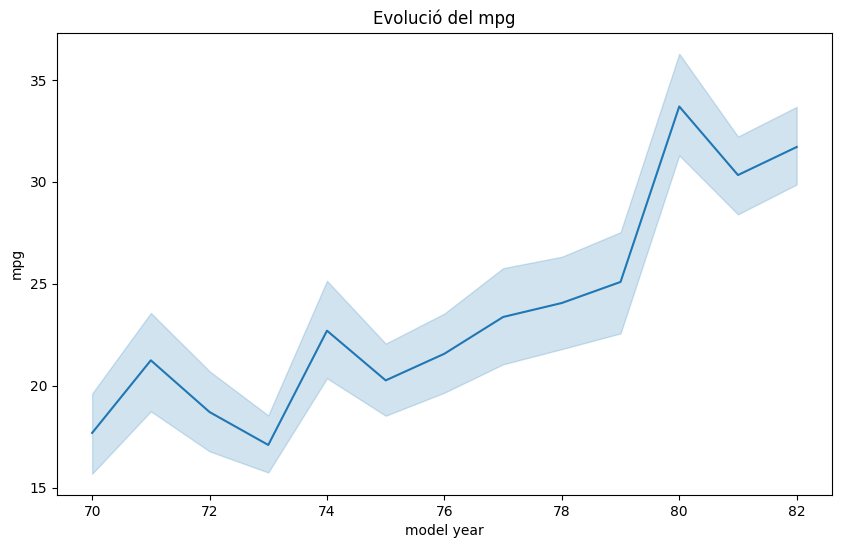

<Figure size 640x480 with 0 Axes>

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
plt.show()
plt.savefig('evolucion.png')

## Multiple panels

We can make a figure with two panels, the upper one representing mpg and the lower one representing the evolution of weight:


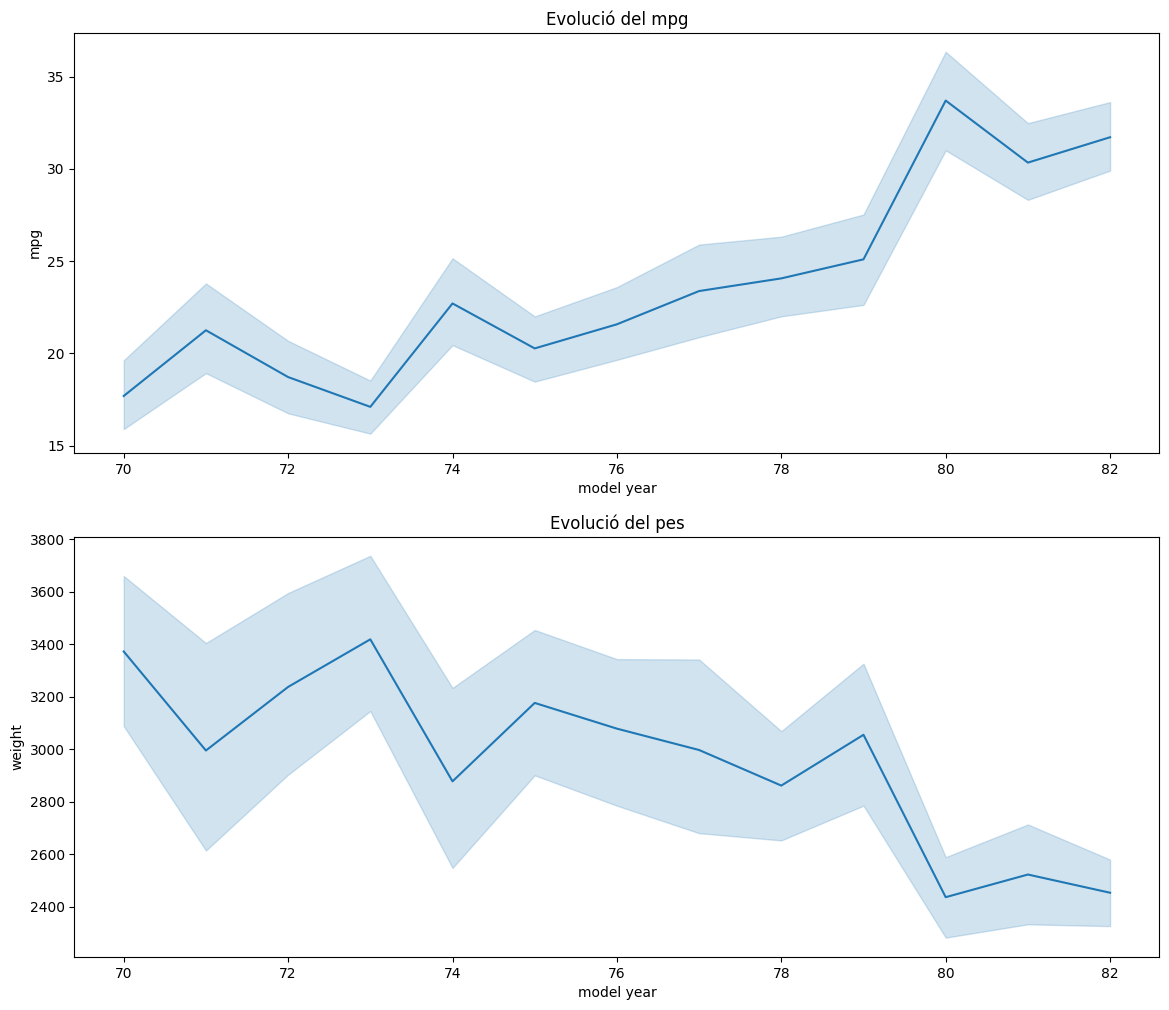

In [39]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(211)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(212)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
plt.show()

Multiple panels in a single graph

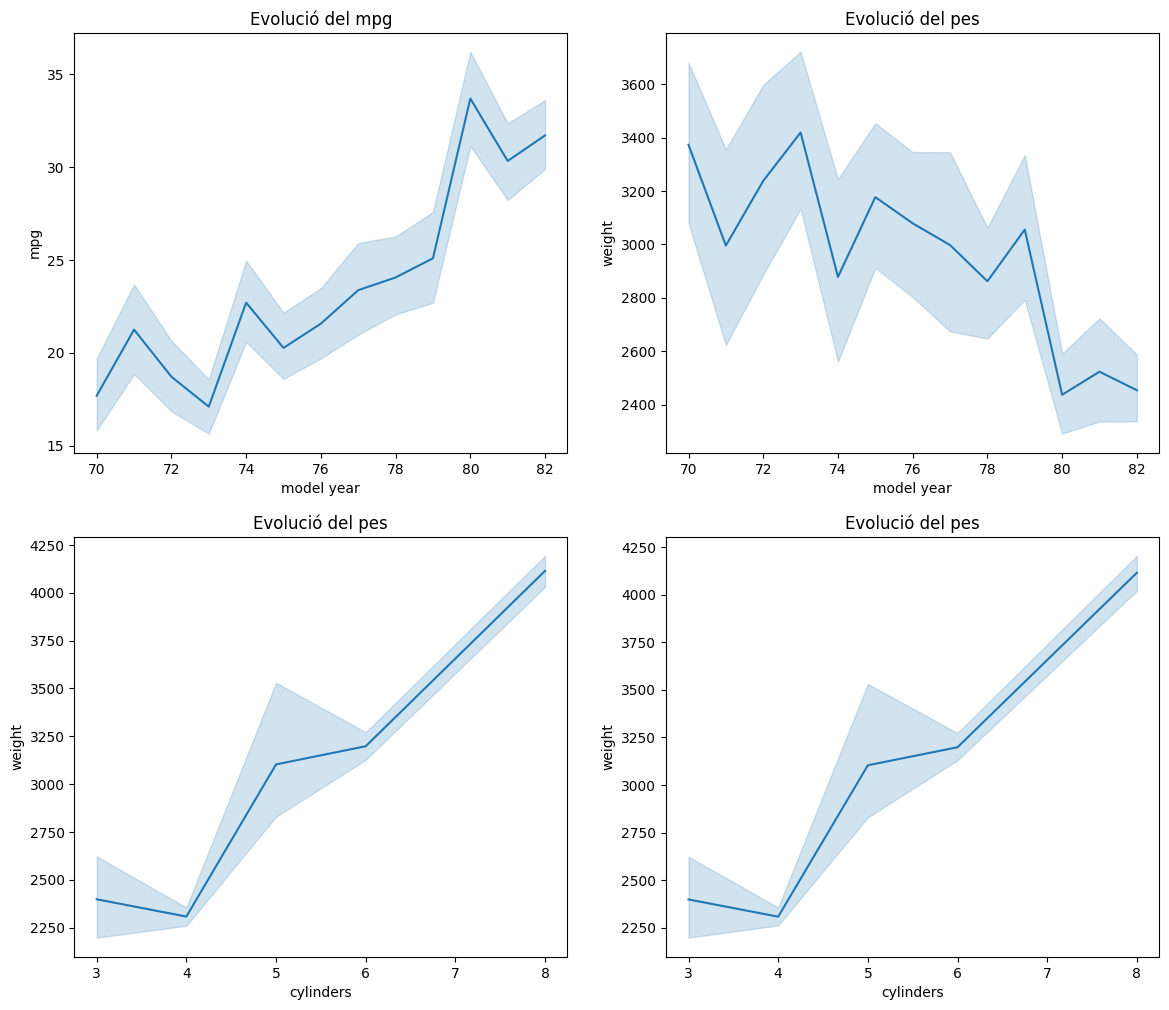

In [40]:
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(221)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(222)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
ax2 = fig.add_subplot(223)
ax2 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax2.set_title('Evolució del pes')
ax3 = fig.add_subplot(224)
ax3 = sns.lineplot(x="cylinders", y="weight", data=df2)
ax3.set_title('Evolució del pes')
plt.show()

## Grouping data in graphs

We can also look at how the mpg evolves depending on its origin:

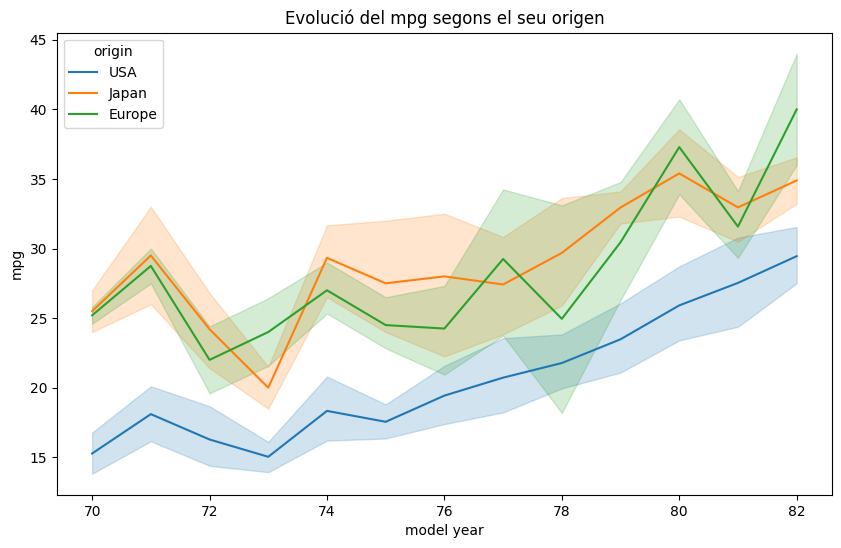

In [41]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg",hue='origin',data=df2)
ax.set_title('Evolució del mpg segons el seu origen')
plt.show()

## Scatter plots

Do we have any correlation between weight and efficiency? Let's look at it:


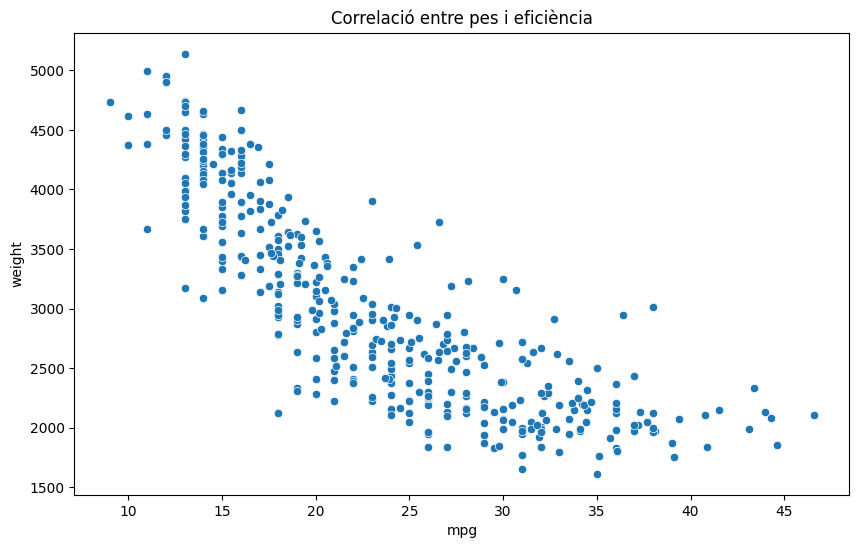

In [42]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mpg", y="weight", data=df2)
ax.set_title('Correlació entre pes i eficiència')
plt.show()

We can make a linear model of the behavior

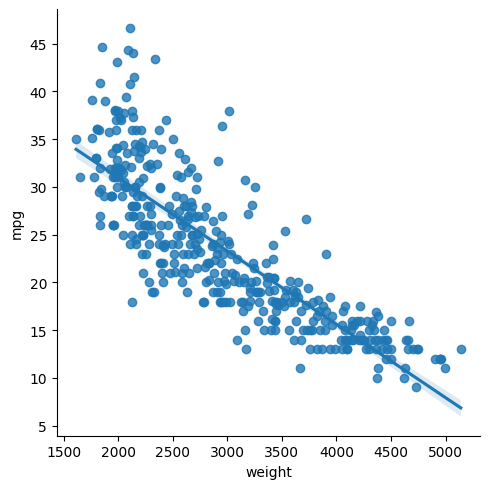

In [43]:
ax = sns.lmplot(x="weight", y="mpg", data=df2)


Taking into account the origin, the relationship between weight and mpg may be different:

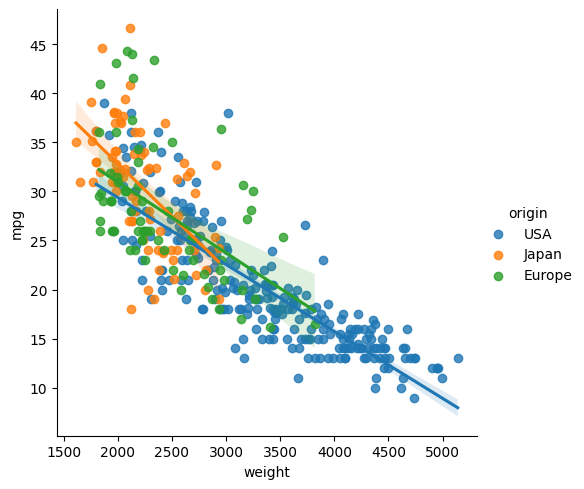

In [44]:
ax = sns.lmplot(x="weight", y="mpg", hue='origin',data=df2)


In fact, we observe that cars of European and Japanese origin tend to have less weight and greater efficiency.

And if we want to represent the acceleration as a function of the number of cylinders? We've got many options:

A Scatterplot doesn't seem like the best option, because the cylinders variable takes discrete values:

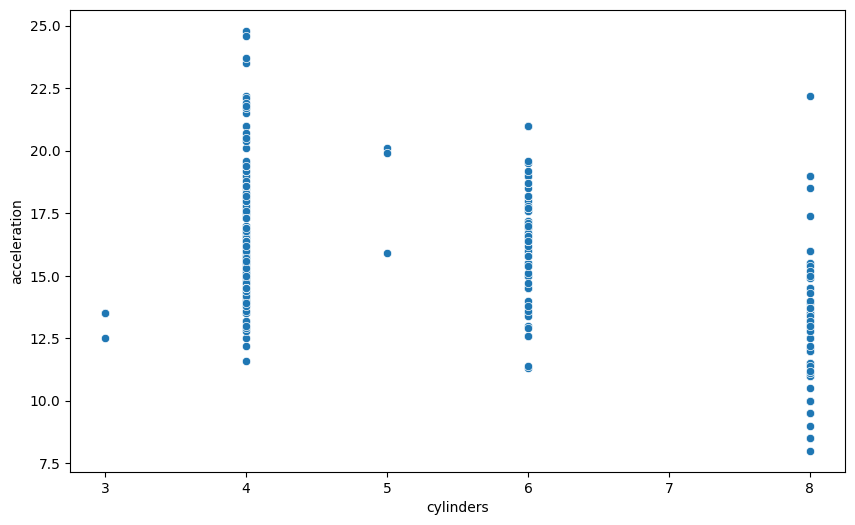

In [45]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="cylinders", y="acceleration", data=df2)
plt.show()

## Bar plots

Better a bar plot

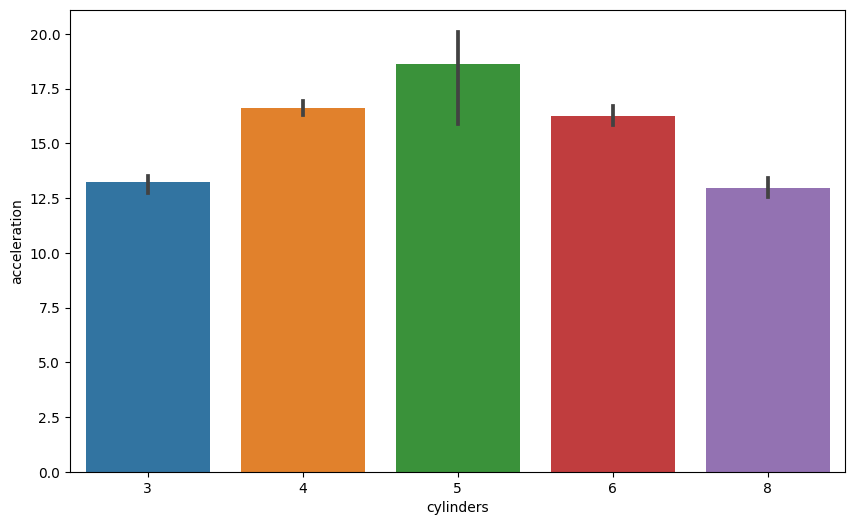

In [46]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", data=df2)
plt.show()

And depending on their origin we see that the cars with only 3 cylinders are Japanese and those with 8 are all the USA.

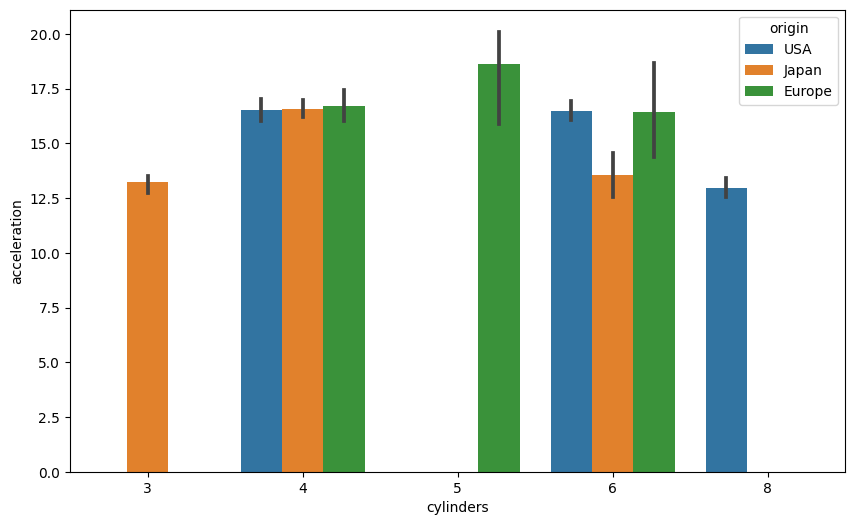

In [47]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", hue='origin',data=df2)
plt.show()

Acceleration vs weight as a function of cylinders


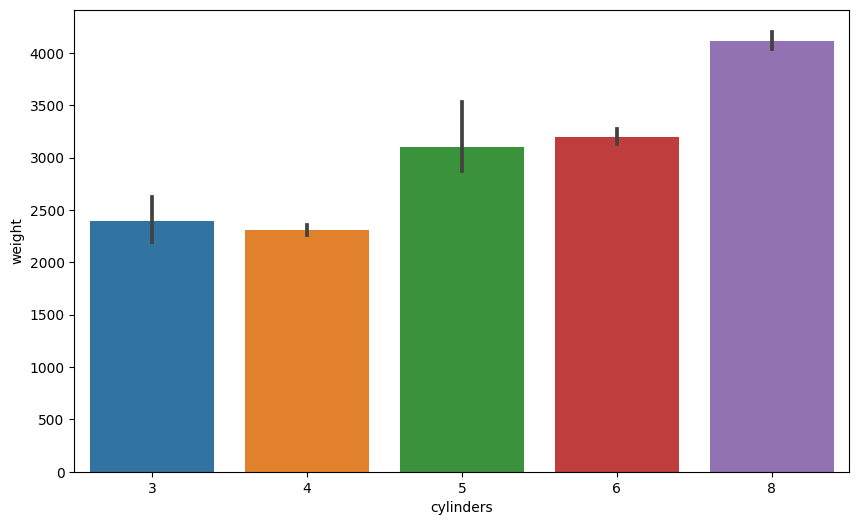

In [48]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="weight", data=df2)
plt.show()

## Histograms

Probability of observing a certain range of values in the distribution of a variable:

What is the distribution of the variable weight?

<ipython-input-49-7a7ff9fa95e4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df2["weight"].values,bins=20)


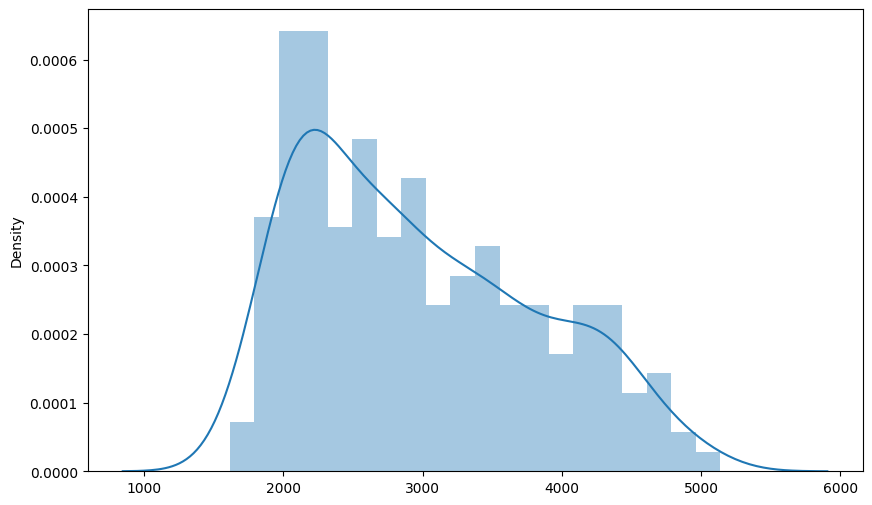

In [49]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)

If we want to mark the position of the mean value and the median of the distribution

<ipython-input-50-2bf32d011c5c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df2["weight"].values,bins=20)


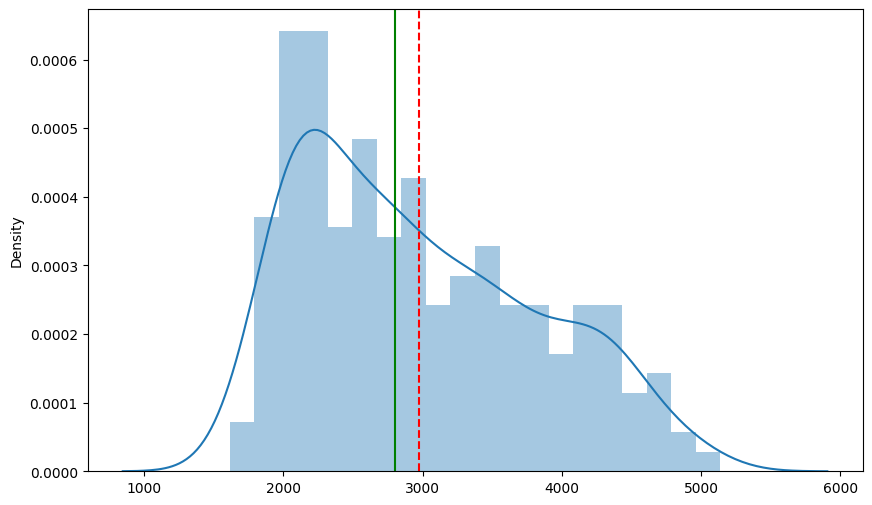

In [50]:
media_weight = df2['weight'].mean()
mediana_weight = df2['weight'].median()

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="r", linestyle="--");
plt.axvline(mediana_weight, color="g", linestyle="-");

Indicate where the mean is and the standard deviations to the left and right of the mean:

In [51]:
std_weight = df2['weight'].std()


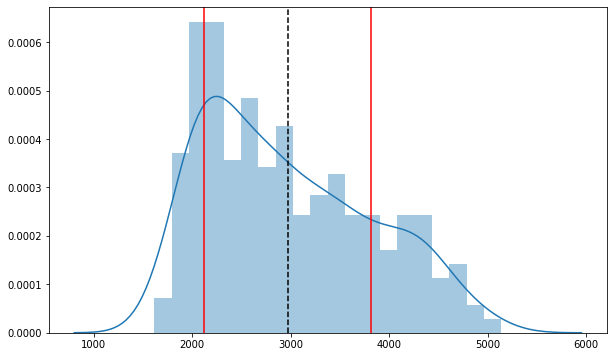

In [ ]:

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="k", linestyle="--");
plt.axvline(media_weight-std_weight, color="r", linestyle="-");
plt.axvline(media_weight+std_weight, color="r", linestyle="-");


## Joint distribution plots

What would the joint distribution of the weight and acceleration variables look like?

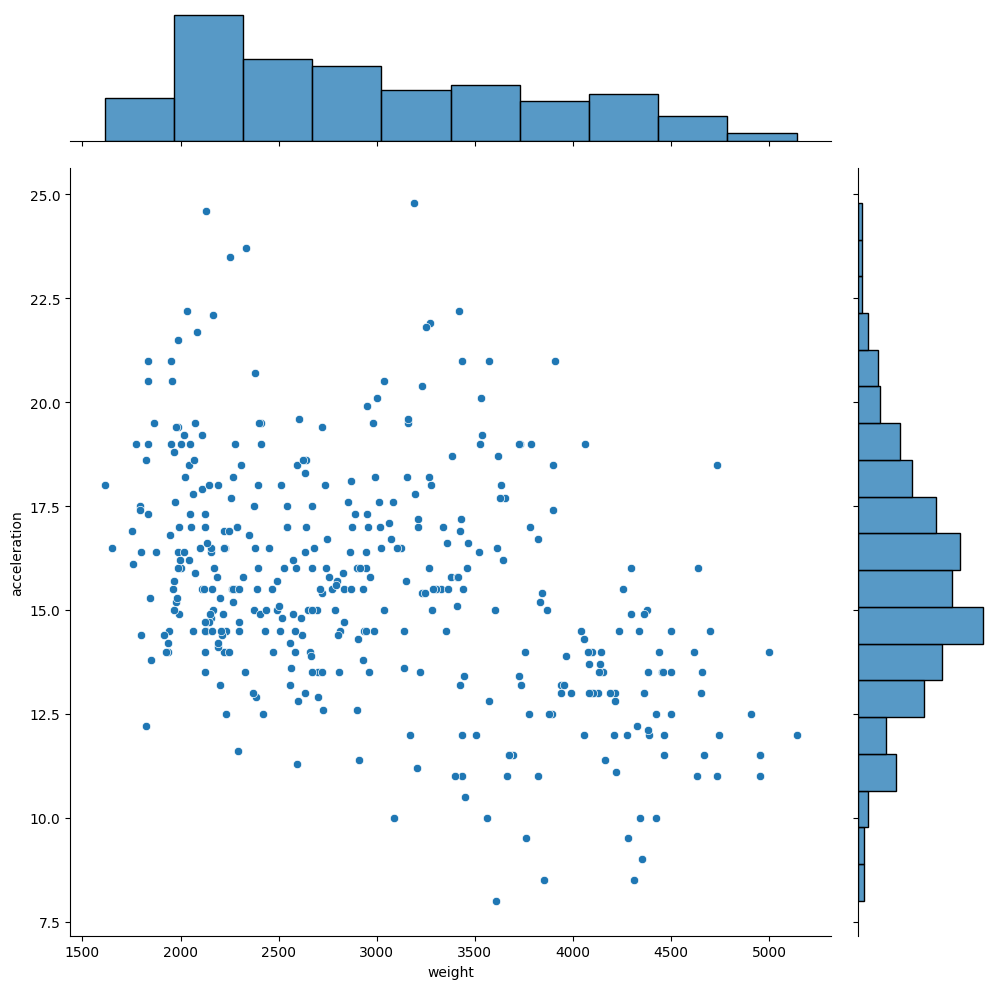

In [52]:
ax = sns.jointplot(x='weight',y='acceleration',data=df2,height=10)

## Multidimensional scatter matrix

Finally, we can make a representation of all the variables simultaneously

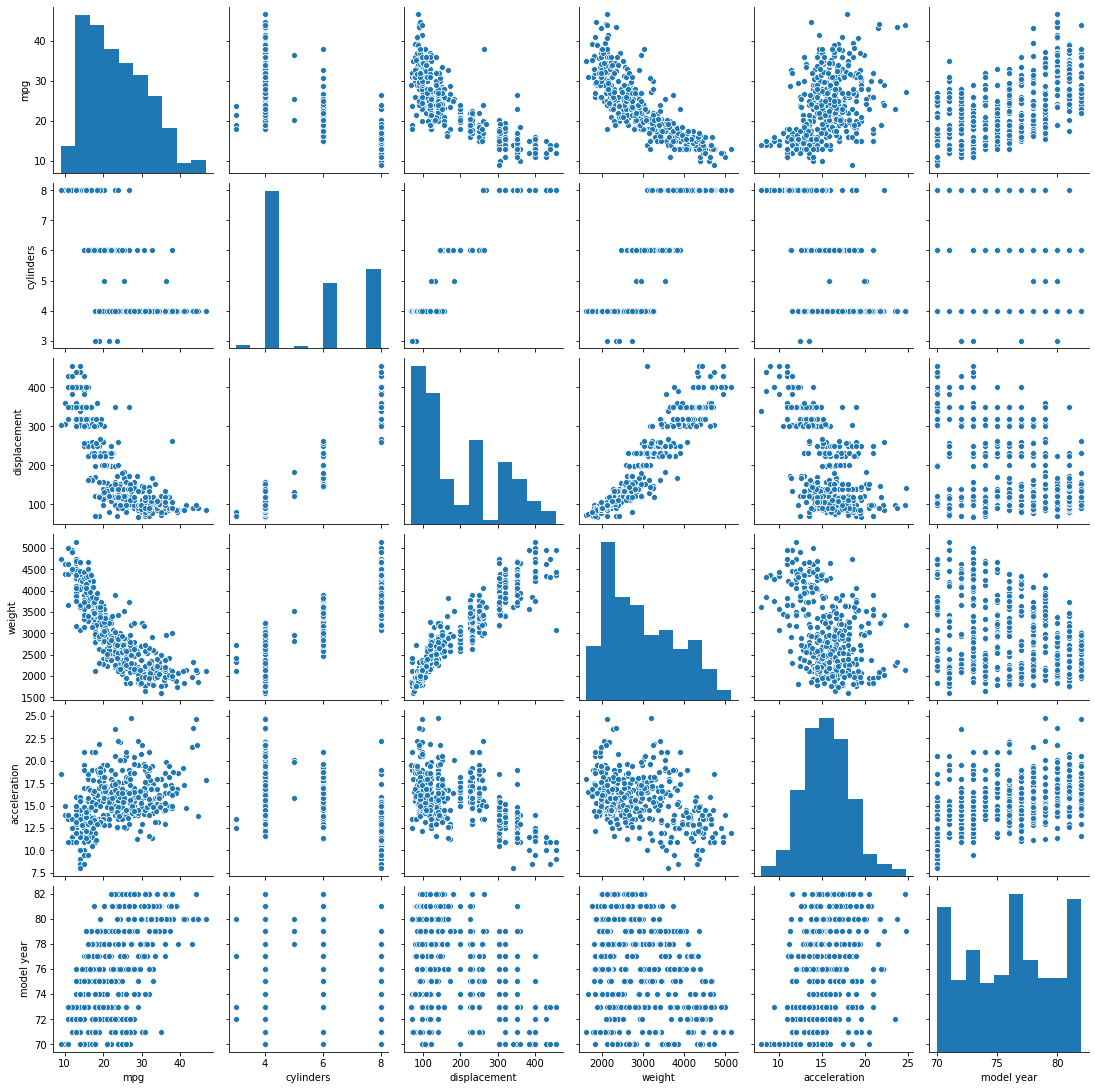

In [ ]:
sns.pairplot(df2)
plt.show()

And the same representation but indicating the cars with different colors according to their origin

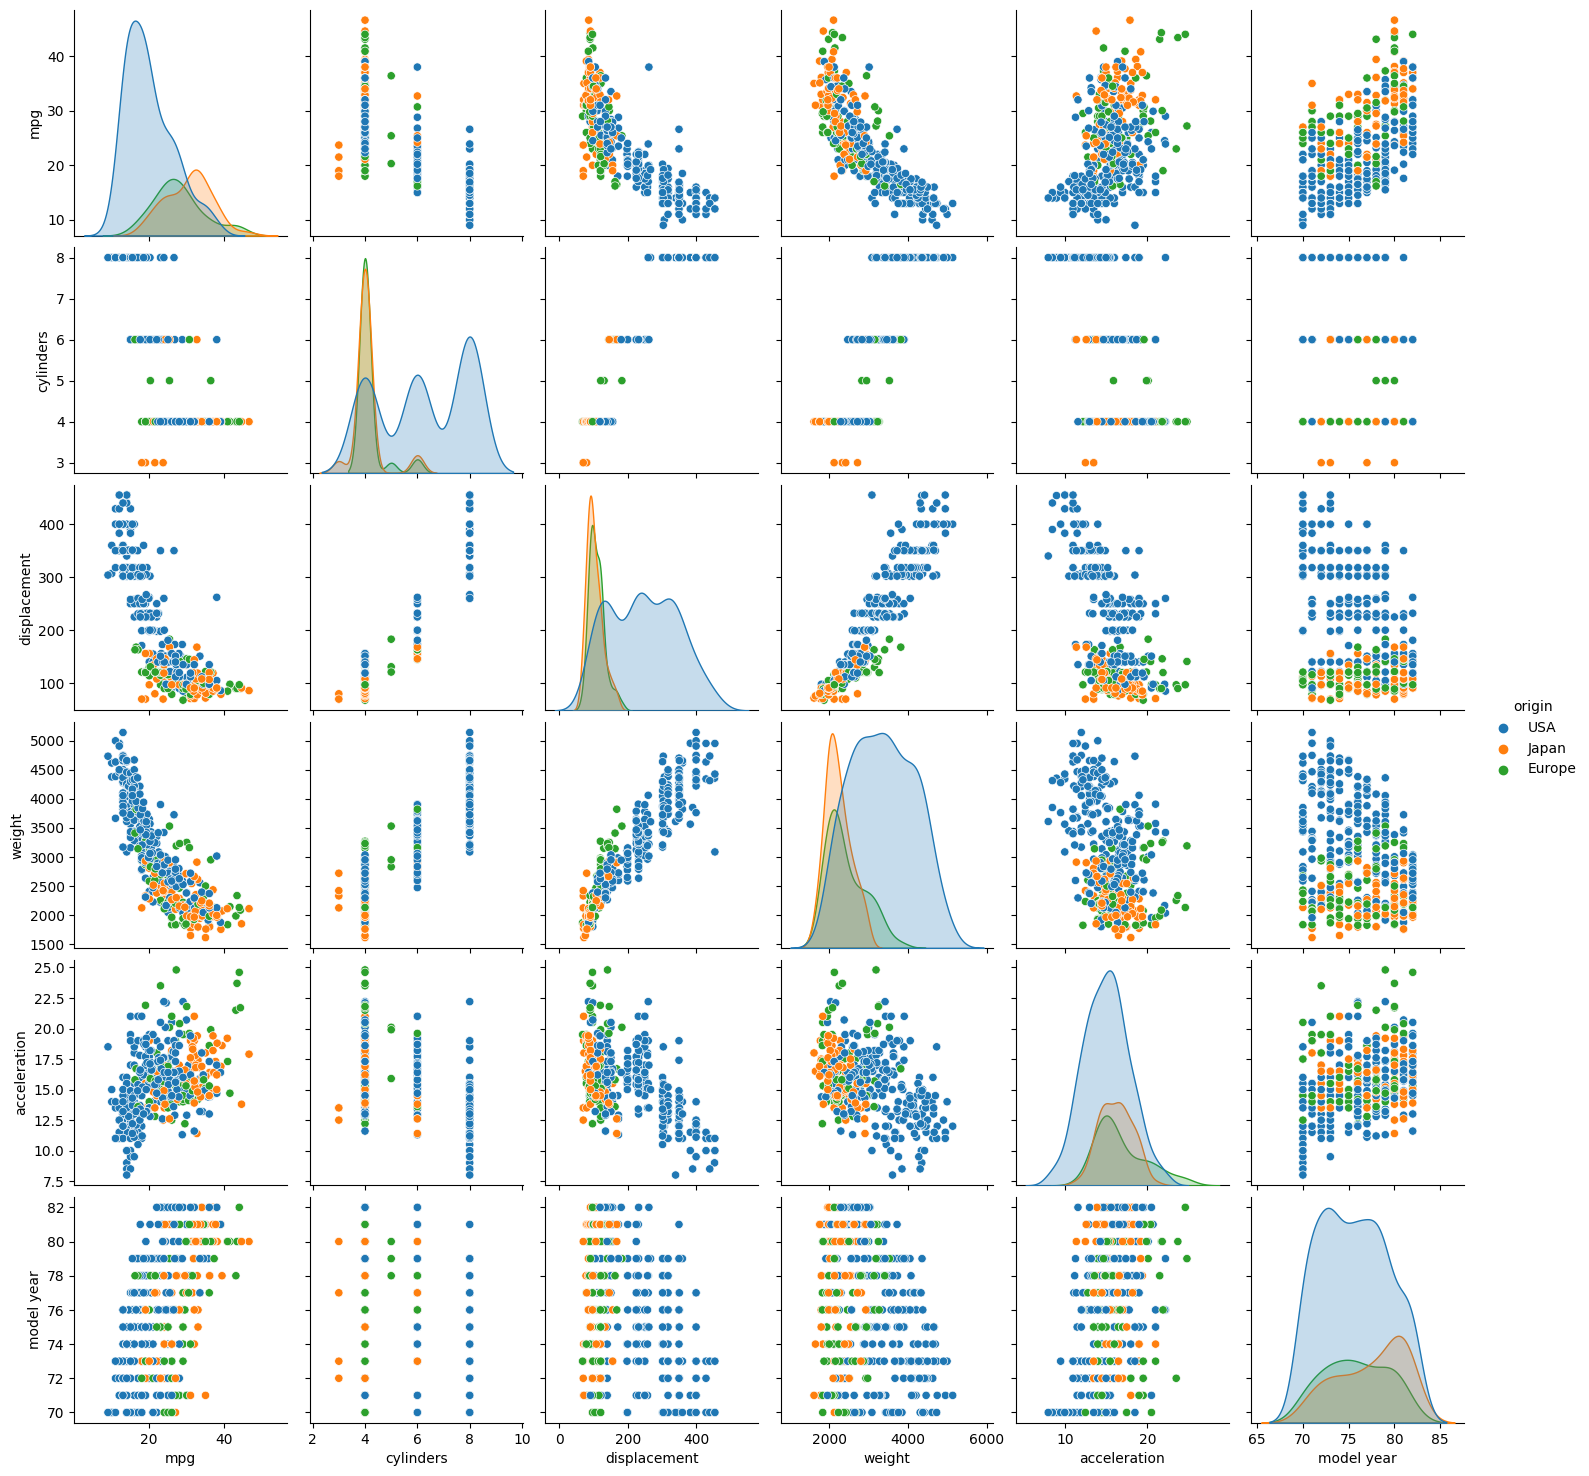

In [53]:
sns.pairplot(df2,hue="origin")


Representing only the numerical features:

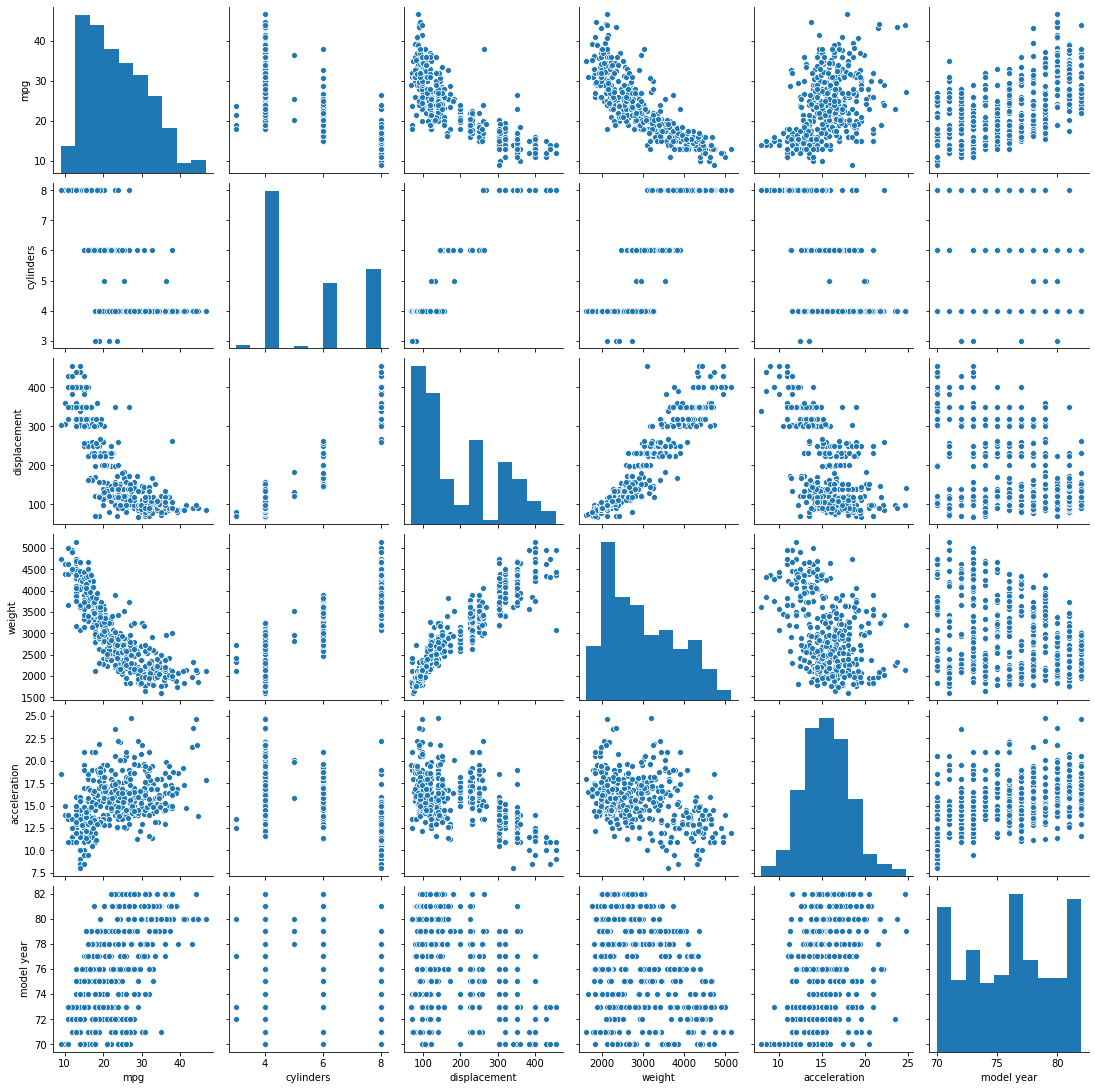

In [ ]:
df2_num = df2.select_dtypes(include='number')
sns.pairplot(df2_num)

## Exercise 2: Load the Boston Crime dataset

And generate a report in the form of a jupyter notebook with the most relevant features

In [ ]:
df3 = pd.read_csv('/content/gdrive/My Drive/data_course/boston_crime/crime.csv', engine='python')
df3.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [ ]:
df3.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000
